<a href="https://colab.research.google.com/github/nakanoelio/i2a2-challenge-petr4-trad-sys/blob/main/I2A2_PETR4_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sn
import matplotlib.pyplot as plt


import yfinance as yf

import yfinance as yf

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima_model import ARIMAResults


#import scipy.stats as scs
#from chapter_3_utils import test_autocorrelation

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
stock_ticker = 'PETR4.SA'
start_date = '2016-1-1'
end_date = '2021-5-27'

yf_petr4 = yf.Ticker(stock_ticker)
df_petr4 = yf_petr4.history(start=start_date, end=end_date)

In [ ]:
df_petr4.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04,5.896552,6.309401,5.878602,6.165801,45962100,0.0,0
2016-01-05,6.210676,6.282476,5.941427,5.995277,29446700,0.0,0
2016-01-06,5.860653,5.869627,5.743978,5.743978,67507200,0.0,0
2016-01-07,5.555503,5.770902,5.456778,5.618328,57387900,0.0,0
2016-01-08,5.726027,5.788852,5.501653,5.627303,52100300,0.0,0


In [ ]:
df_petr4.drop(['Volume','Dividends','Stock Splits'],axis=1,inplace=True)

Metodologia ARIMA (Autoregressive Integrated Moving-Average
para modelagem de séies temporais:

In [ ]:
def series_graph(df_series, column_name):
    df_series_diff = df_series[column_name].diff().dropna()
    fig, ax = plt.subplots(2, sharex=True)
    df_series[column_name].plot(title = f"{stock_ticker}'s stock price", ax=ax[0])
    df_series_diff.plot(ax=ax[1], title='First Differences',figsize=(20,10))

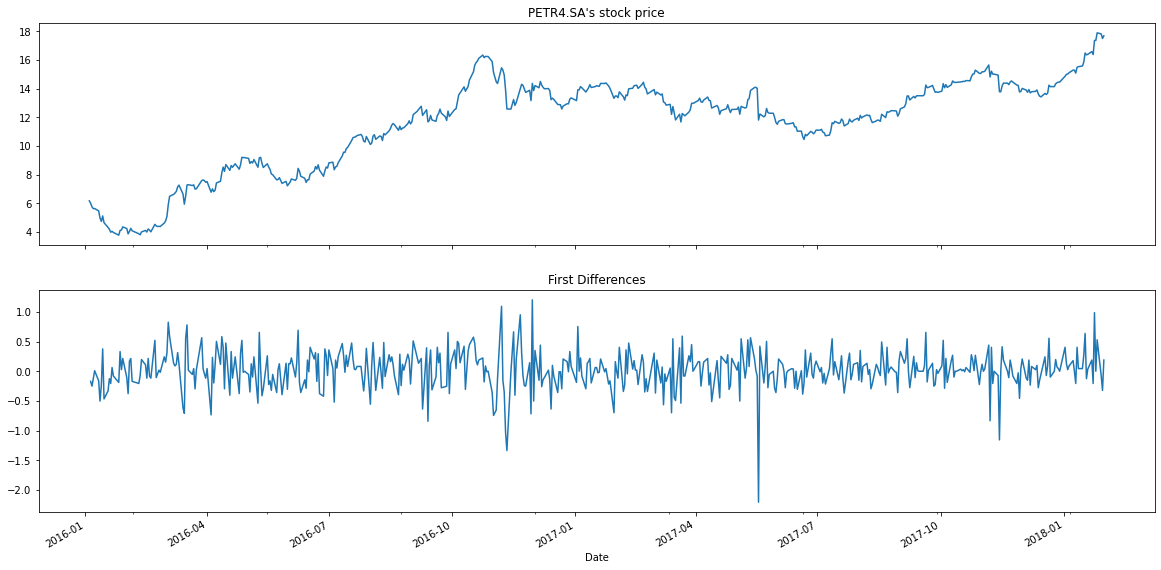

In [ ]:
series_graph(df_petr4.iloc[:525], "Close")

In [ ]:
def adf_test(df_series):
    print ('Results of Dickey-Fuller Test:')
    df_test = adfuller(df_series, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df_test[4].items():
       df_output['Critical Value (%s)'%key] = value
    print (df_output)

In [ ]:
adf_test(df_petr4["Close"].iloc[:525])

Results of Dickey-Fuller Test:
Test Statistic                  -0.977128
p-value                          0.761515
#Lags Used                       1.000000
Number of Observations Used    523.000000
Critical Value (1%)             -3.442915
Critical Value (5%)             -2.867082
Critical Value (10%)            -2.569722
dtype: float64


In [ ]:
def acf_pacf(df_series):
    fig = plt.figure(figsize=(12,10))
    ax1 = fig.add_subplot(211)
    fig = plot_acf(df_series.values.squeeze(), lags=100, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = plot_pacf(df_series, lags=40, ax=ax2)

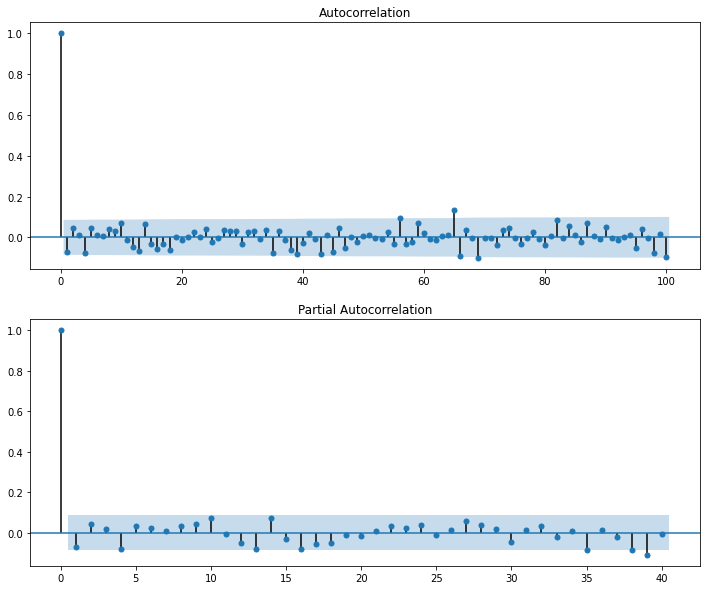

In [ ]:
acf_pacf(df_petr4["Close"].iloc[:525].diff().dropna())

In [ ]:
arima_model = ARIMA(df_petr4["Close"].iloc[:525], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  524
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -150.304
Method:                       css-mle   S.D. of innovations              0.322
Date:                Sun, 30 May 2021   AIC                            308.608
Time:                        19:27:14   BIC                            325.654
Sample:                             1   HQIC                           315.283
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0220      0.013      1.652      0.099      -0.004       0.048
ar.L1.D.Close    -0.3006      0.312     -0.963      0.336      -0.912       0.311
ma.L1.D.Close     0.2282      0.317     

In [ ]:
print(type(arima_model_fit))

<class 'statsmodels.tsa.arima_model.ARIMAResultsWrapper'>


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


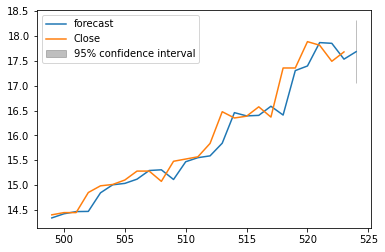

In [ ]:
fig = arima_model_fit.plot_predict(start=500, end=525)

Naive Bayes com as features sendo os retornos passado (positivos(3), zero(2), ou negativos(1)) e as classes o retorno atual (positivos(3), zero(2), ou negativo(1))

In [ ]:
df_petr4_close = pd.DataFrame(df_petr4["Close"])

In [ ]:
def feat_gen(data_f, p_window):
    
    data_frame = data_f.copy()

    data_frame["Close_Return"] = data_frame["Close"].diff()
    data_frame["Close_Return_Rel"] = data_frame["Close"].pct_change()
    
    #data_frame["Close_Return"].fillna(0,inplace=True)
    #data_frame["Close_Return_Rel"].fillna(0,inplace=True)

    data_frame.loc[data_frame["Close_Return_Rel"] > 0, "Close_Return_Disc"] = 3
    data_frame.loc[data_frame["Close_Return_Rel"] == 0, "Close_Return_Disc"] = 2
    data_frame.loc[data_frame["Close_Return_Rel"] < 0, "Close_Return_Disc"] = 1

    new_col_names = []
    for i in range(1,p_window+1):
        data_frame[f'Delta_{i}P_CRR'] = data_frame["Close_Return_Disc"].shift(periods=i)
        new_col_names.append(f'Delta_{i}P_CRR')
    
    #for i in new_col_names:
        
        #data_frame = pd.concat([data_frame, pd.get_dummies(data_frame[i],prefix=i)],axis=1)

    return data_frame


In [ ]:
p_window = 3
df_petr4_close_feat = feat_gen(df_petr4_close, p_window)

In [ ]:
df_petr4_close_feat.head(5)



,Close,Close_Return,Close_Return_Rel,Close_Return_Disc,Delta_1P_CRR,Delta_2P_CRR,Delta_3P_CRR
Date,,,,,,,
2016-01-04,6.165801,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,5.995277,-0.170524,-0.027656,1.0,NaN,NaN,NaN
2016-01-06,5.743978,-0.251299,-0.041916,1.0,1.0,NaN,NaN
2016-01-07,5.618328,-0.125650,-0.021875,1.0,1.0,1.0,NaN
2016-01-08,5.627303,0.008975,0.001597,3.0,1.0,1.0,1.0


In [ ]:
print(df_petr4_close.index.get_loc("2018-02-01 00:00:00"))

525


In [ ]:
#X = df_petr4_close_feat.iloc[p_window:400,4+p_window:]
#X_test = df_petr4_close_feat.iloc[400:525,4+p_window:]
X = df_petr4_close_feat.iloc[p_window+1:400,4:]
X_test = df_petr4_close_feat.iloc[400:525,4:]
y = df_petr4_close_feat.iloc[p_window+1:400,3]
y_test = df_petr4_close_feat.iloc[400:525,3]

In [ ]:
print(X,y)

            Delta_1P_CRR  Delta_2P_CRR  Delta_3P_CRR
Date                                                
2016-01-08           1.0           1.0           1.0
2016-01-11           3.0           1.0           1.0
2016-01-12           1.0           3.0           1.0
2016-01-13           1.0           1.0           3.0
2016-01-14           1.0           1.0           1.0
...                  ...           ...           ...
2017-08-02           1.0           3.0           3.0
2017-08-03           3.0           1.0           3.0
2017-08-04           1.0           3.0           1.0
2017-08-07           3.0           1.0           3.0
2017-08-08           3.0           3.0           1.0

[396 rows x 3 columns] Date
2016-01-08    3.0
2016-01-11    1.0
2016-01-12    1.0
2016-01-13    1.0
2016-01-14    3.0
             ... 
2017-08-02    3.0
2017-08-03    1.0
2017-08-04    3.0
2017-08-07    3.0
2017-08-08    1.0
Name: Close_Return_Disc, Length: 396, dtype: float64


In [ ]:
def run_model(X,y,X_test,y_test,model_type):

    nb_model = model_type
    nb_model.fit(X, y)

    y_pred = nb_model.predict(X_test)
    print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
    cf_train2 = metrics.confusion_matrix(y_test, y_pred, normalize="all")                                  
    sn.heatmap(cf_train2,linewidths=.5,annot=True,cmap="YlGnBu",cbar=False,square=True,xticklabels=(1,2,3), yticklabels=(1,2,3))
    
    return nb_model

Number of mislabeled points out of a total 125 points : 61


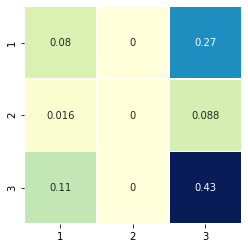

In [ ]:
gnb = run_model(X,y,X_test,y_test,GaussianNB())


Number of mislabeled points out of a total 125 points : 57


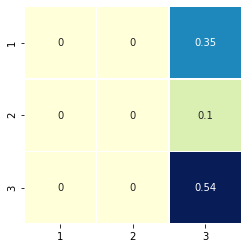

In [ ]:
bnb = run_model(X,y,X_test,y_test,BernoulliNB())

Number of mislabeled points out of a total 125 points : 64


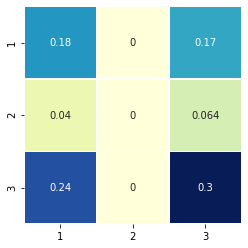

In [ ]:
comnb = run_model(X,y,X_test,y_test,ComplementNB())

Number of mislabeled points out of a total 125 points : 68


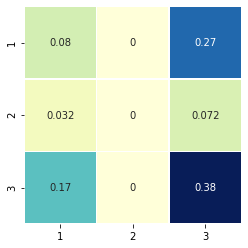

In [ ]:
catnb = run_model(X,y,X_test,y_test,CategoricalNB())